# **PCA**

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Task 1: Exploratory Data Analysis (EDA):**

### **1.	Load the dataset and perform basic data exploration.**

In [5]:
# Load the dataset
wine_data = pd.read_csv('/content/wine.csv')

In [6]:
# Display basic information about the dataset
print(wine_data.info())
print(wine_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  

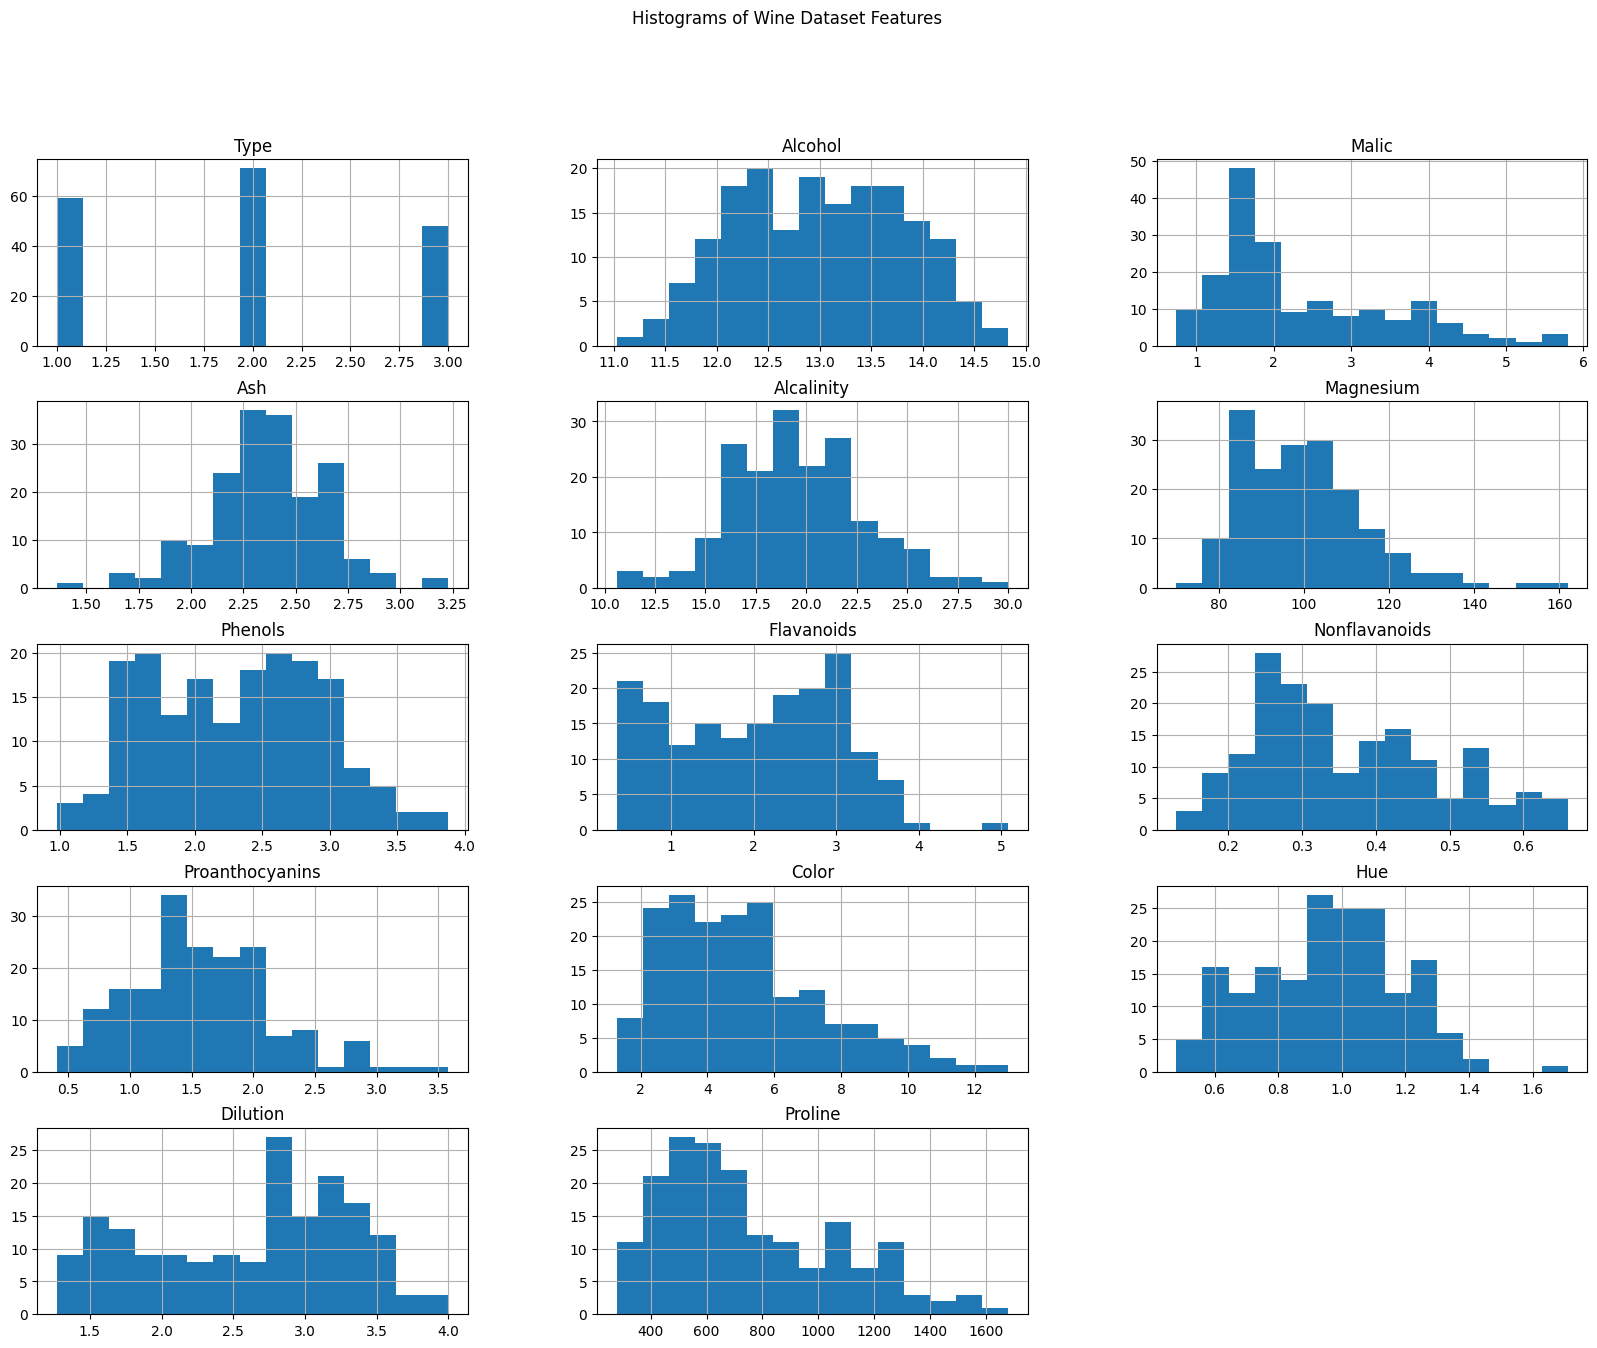

In [7]:
# Plot histograms for all the features
wine_data.hist(bins=15, figsize=(20, 15), layout=(5, 3))
plt.suptitle('Histograms of Wine Dataset Features')
plt.show()

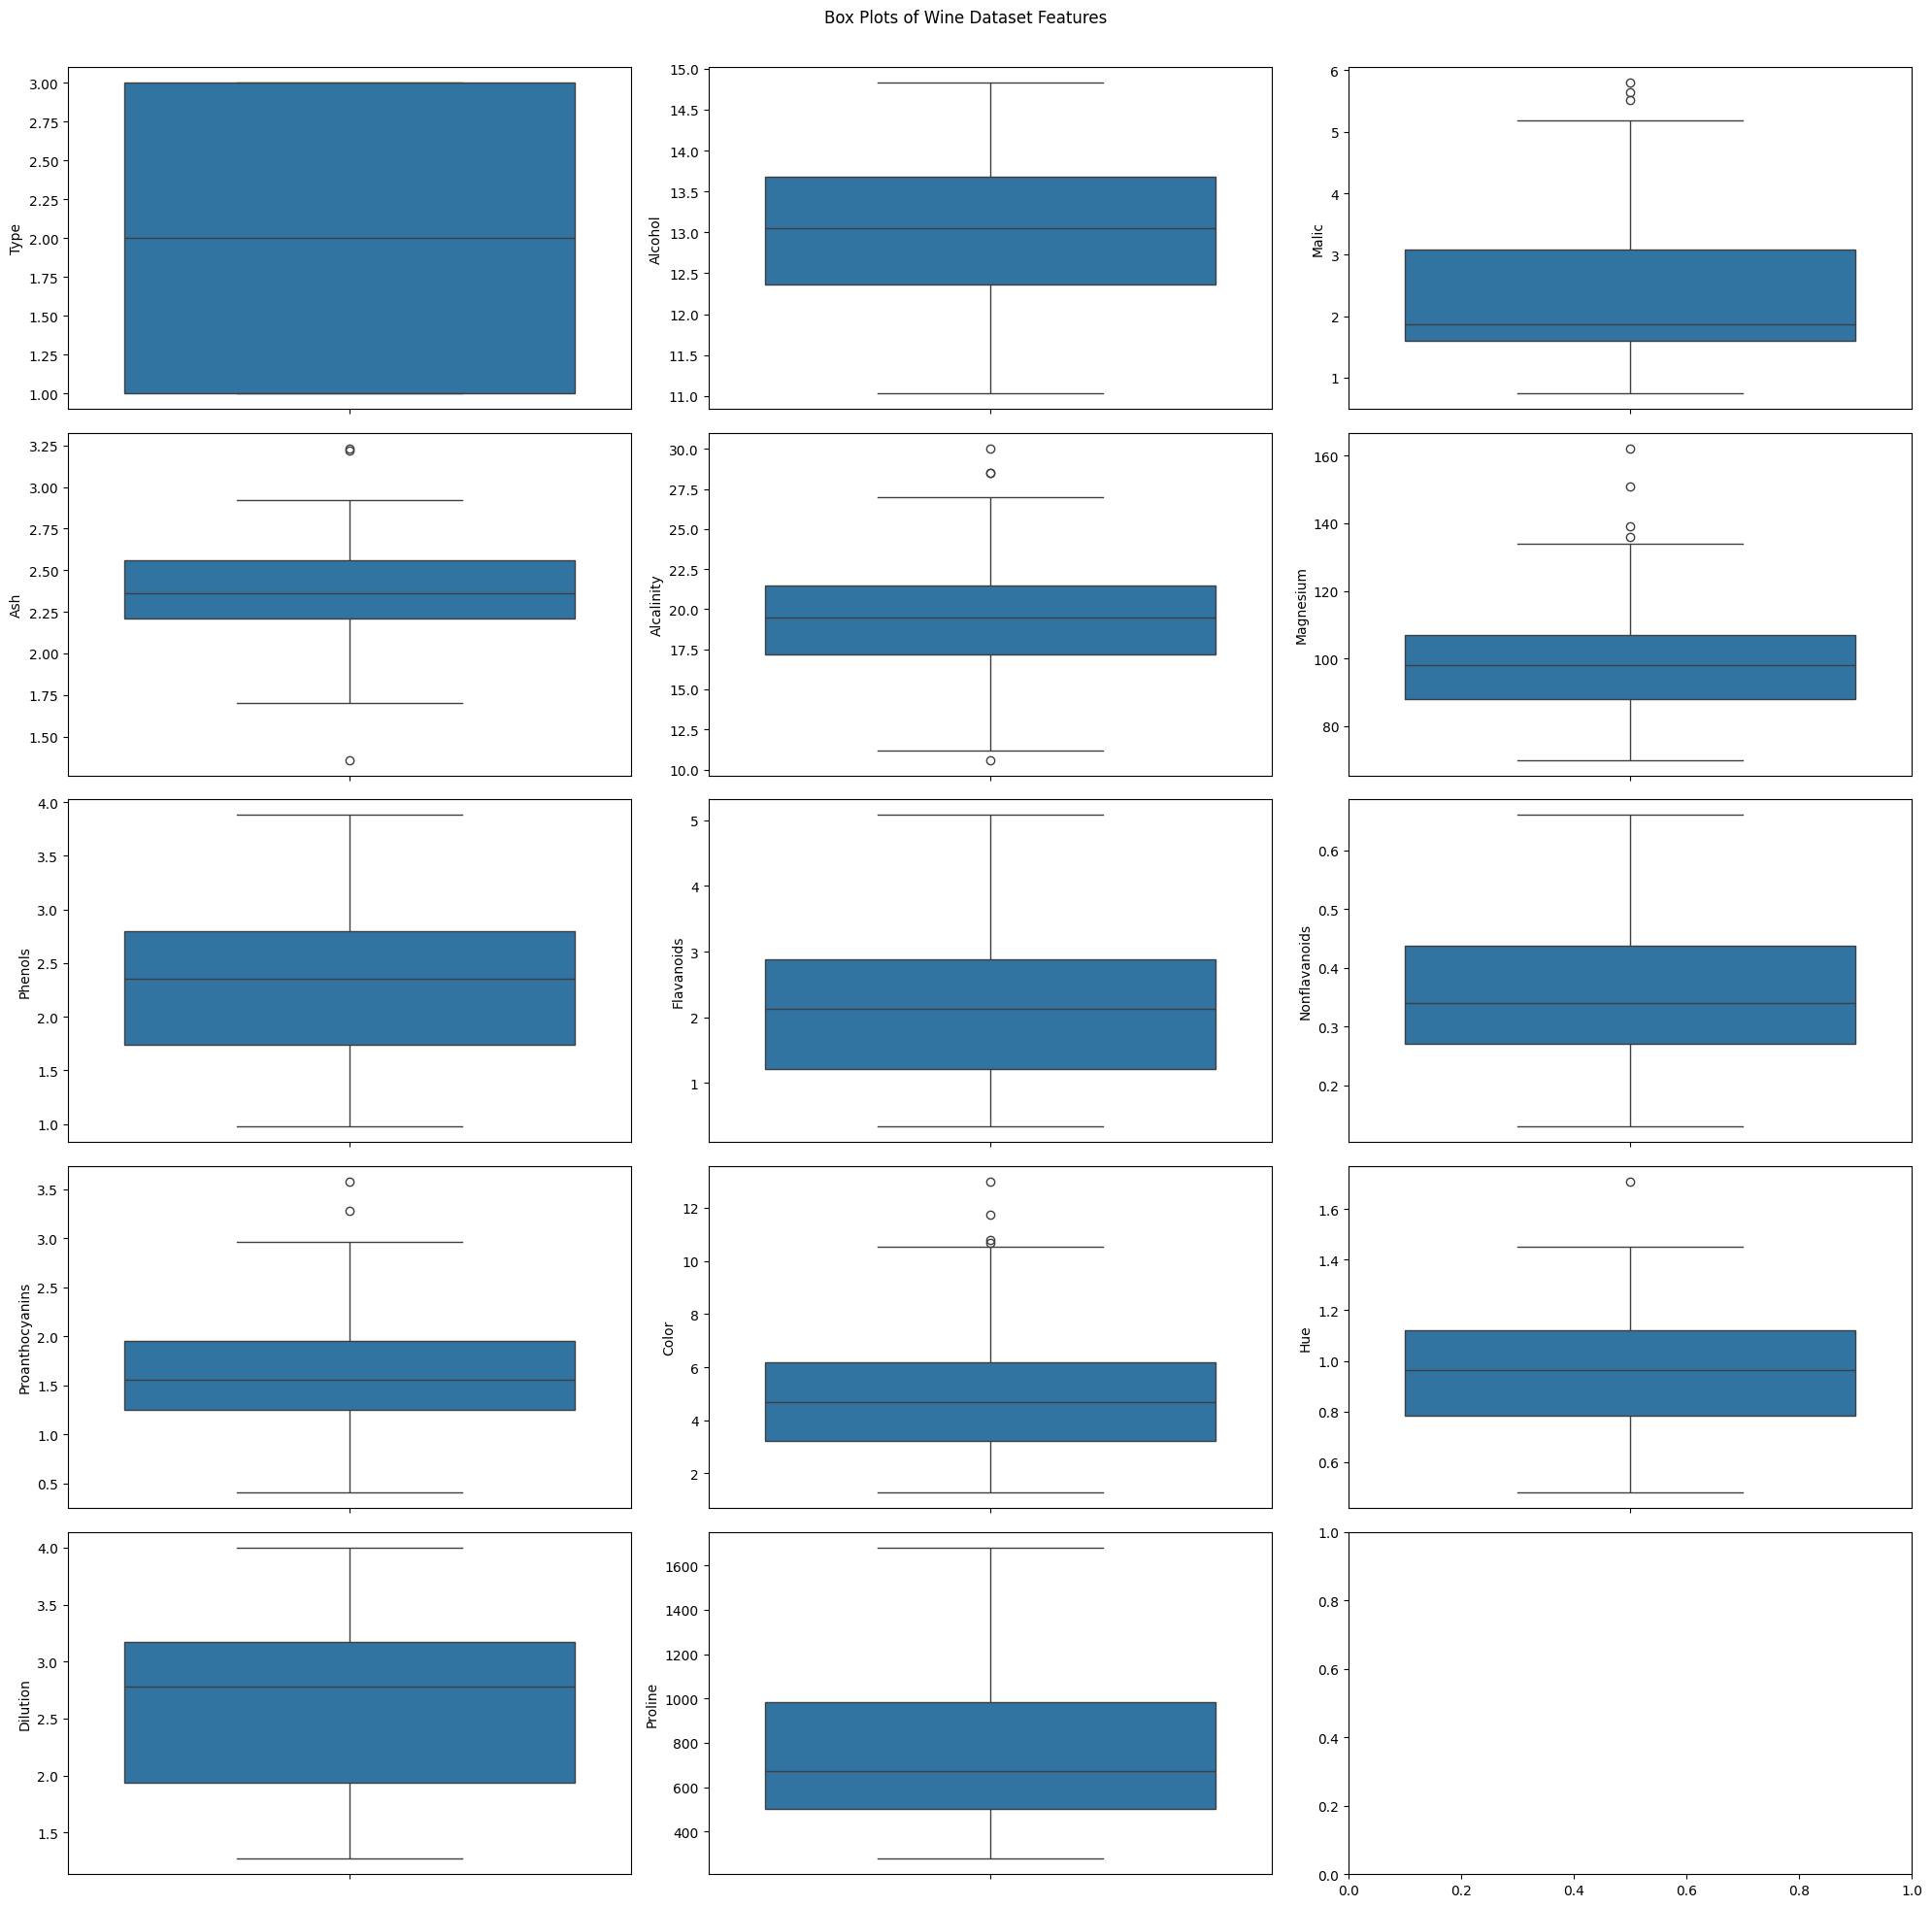

In [8]:
# Plot box plots for all the features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
fig.suptitle('Box Plots of Wine Dataset Features')
for idx, feature in enumerate(wine_data.columns):
    sns.boxplot(y=wine_data[feature], ax=axes[idx//3, idx%3])
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [9]:
# Calculate the correlation matrix
correlation_matrix = wine_data.corr()

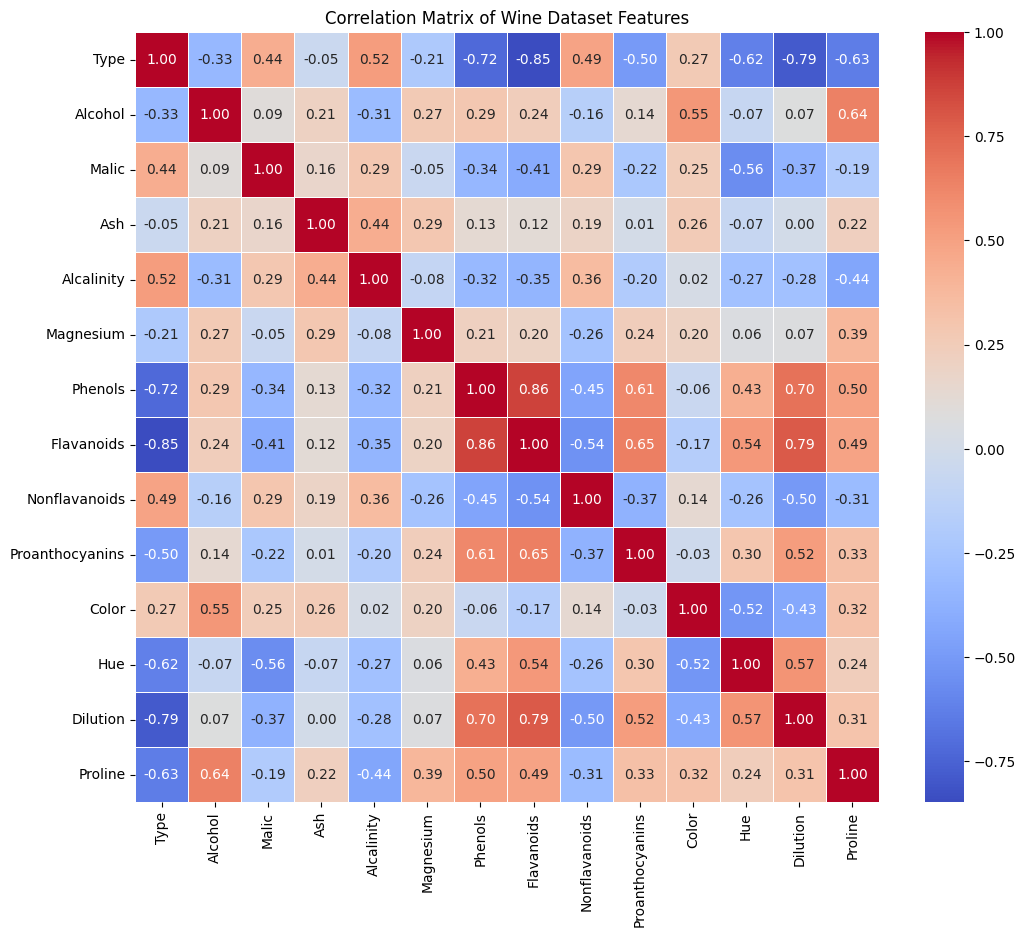

In [10]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

## **Task 2: Dimensionality Reduction with PCA:**

### Standardize the features and perform PCA.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_data.drop(columns=['Type']))

In [13]:
# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

### **2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.**

In [14]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

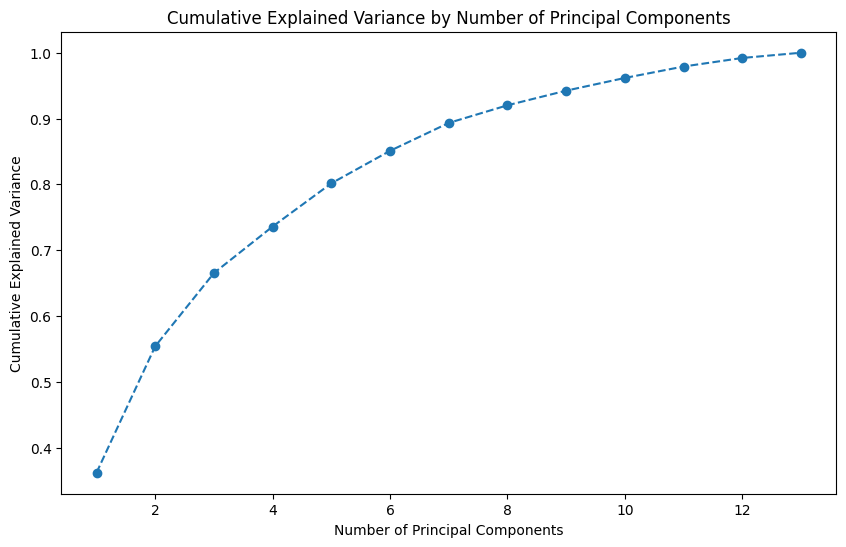

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [16]:
# Choose the number of components that explain a high percentage of variance (e.g., 95%)
n_components = next(x[0] for x in enumerate(cumulative_variance) if x[1] > 0.95) + 1
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

In [17]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2  2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4  1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   

        PC8       PC9      PC10  
0  0.065139  0.641443  1.020956  
1  1.024416 -0.308847  0.159701  
2 -0.344216 -1.177834  0.113361  
3  0.643593  0.052544  0.239413  
4  0.416700  0.326819 -0.078366

## **Task 3: Clustering with Original Data:**

### **1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.**

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [19]:
# Apply K-means clustering to the original dataset
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
# Add the cluster labels to the original DataFrame
wine_data['Cluster_Original'] = clusters_original

### **2.	Visualize the clustering results using appropriate plots.**

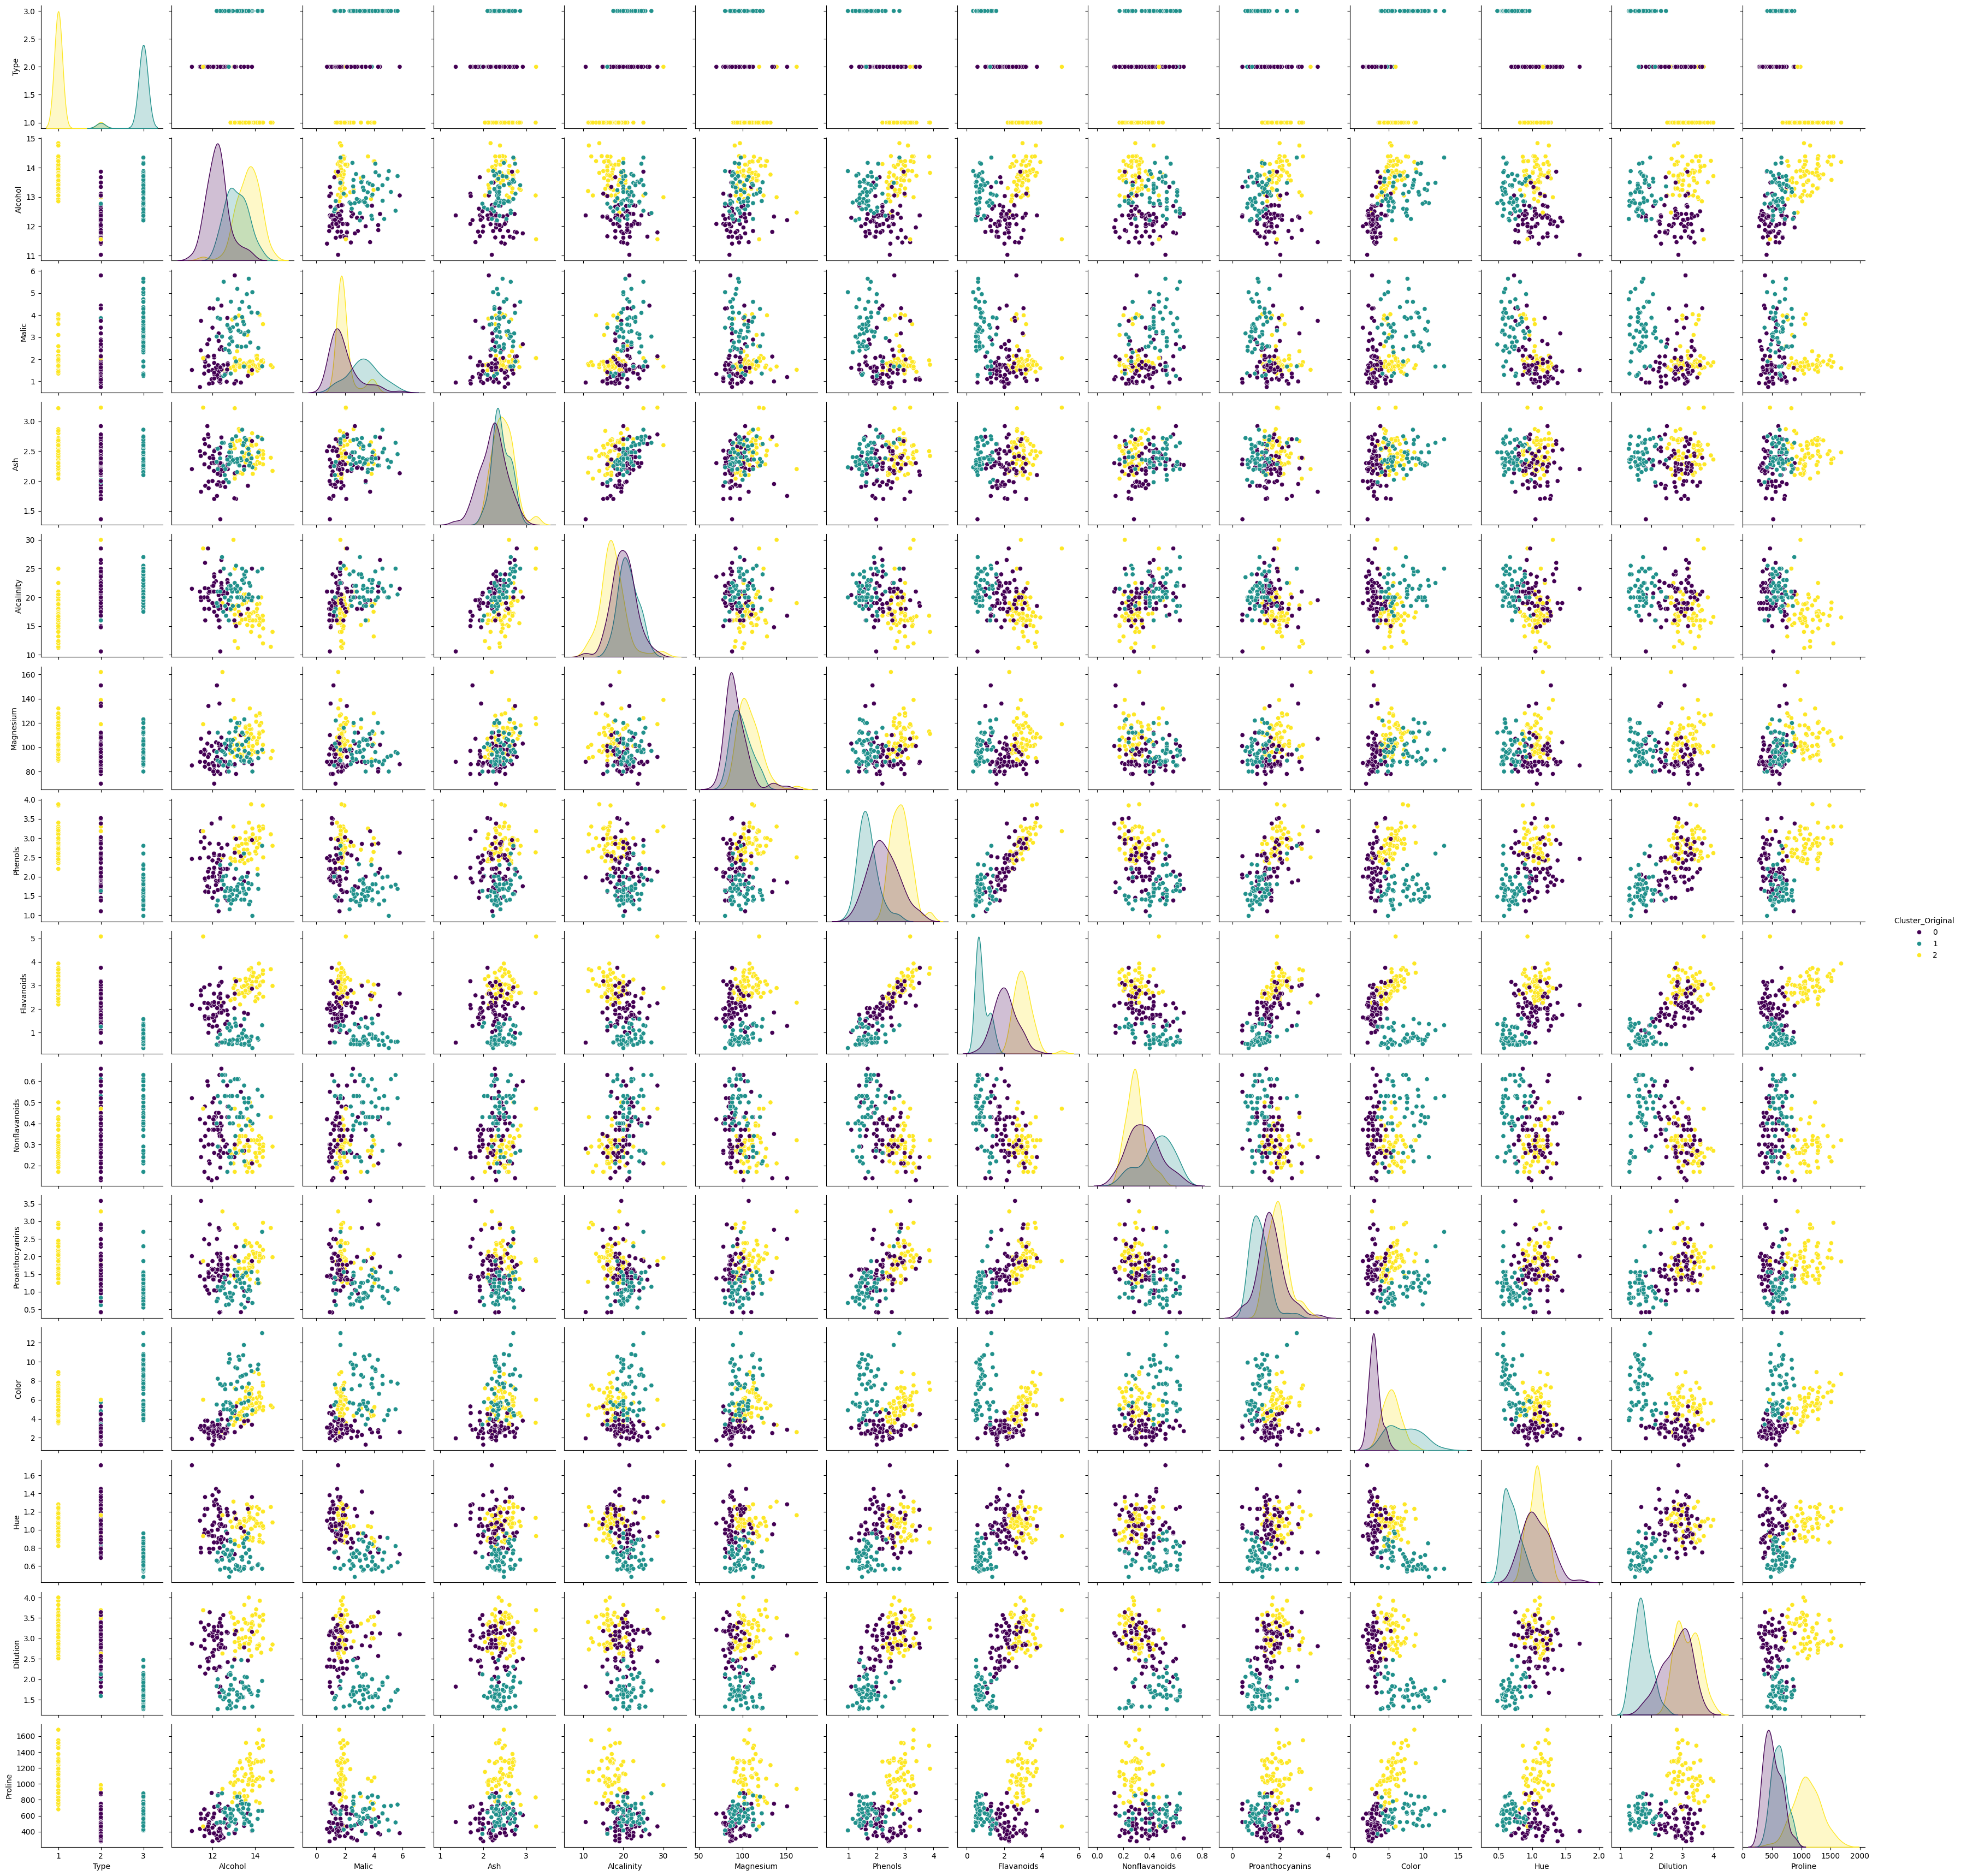

In [21]:
sns.pairplot(wine_data, hue='Cluster_Original', palette='viridis')
plt.show()

### **3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.**

In [22]:
# Evaluate clustering performance
silhouette_original = silhouette_score(scaled_data, clusters_original)
davies_bouldin_original = davies_bouldin_score(scaled_data, clusters_original)
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies–Bouldin Index (Original Data): {davies_bouldin_original}')

Silhouette Score (Original Data): 0.2848589191898987
Davies–Bouldin Index (Original Data): 1.3891879777181648


## **Task 4: Clustering with PCA Data:**

### **1.	Apply the same clustering algorithm to the PCA-transformed dataset.**

In [23]:
# Apply K-means clustering to the PCA-transformed dataset
clusters_pca = kmeans.fit_predict(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
# Add the cluster labels to the PCA DataFrame
pca_df['Cluster_PCA'] = clusters_pca

### **2.	Visualize the clustering results obtained from PCA-transformed data.**

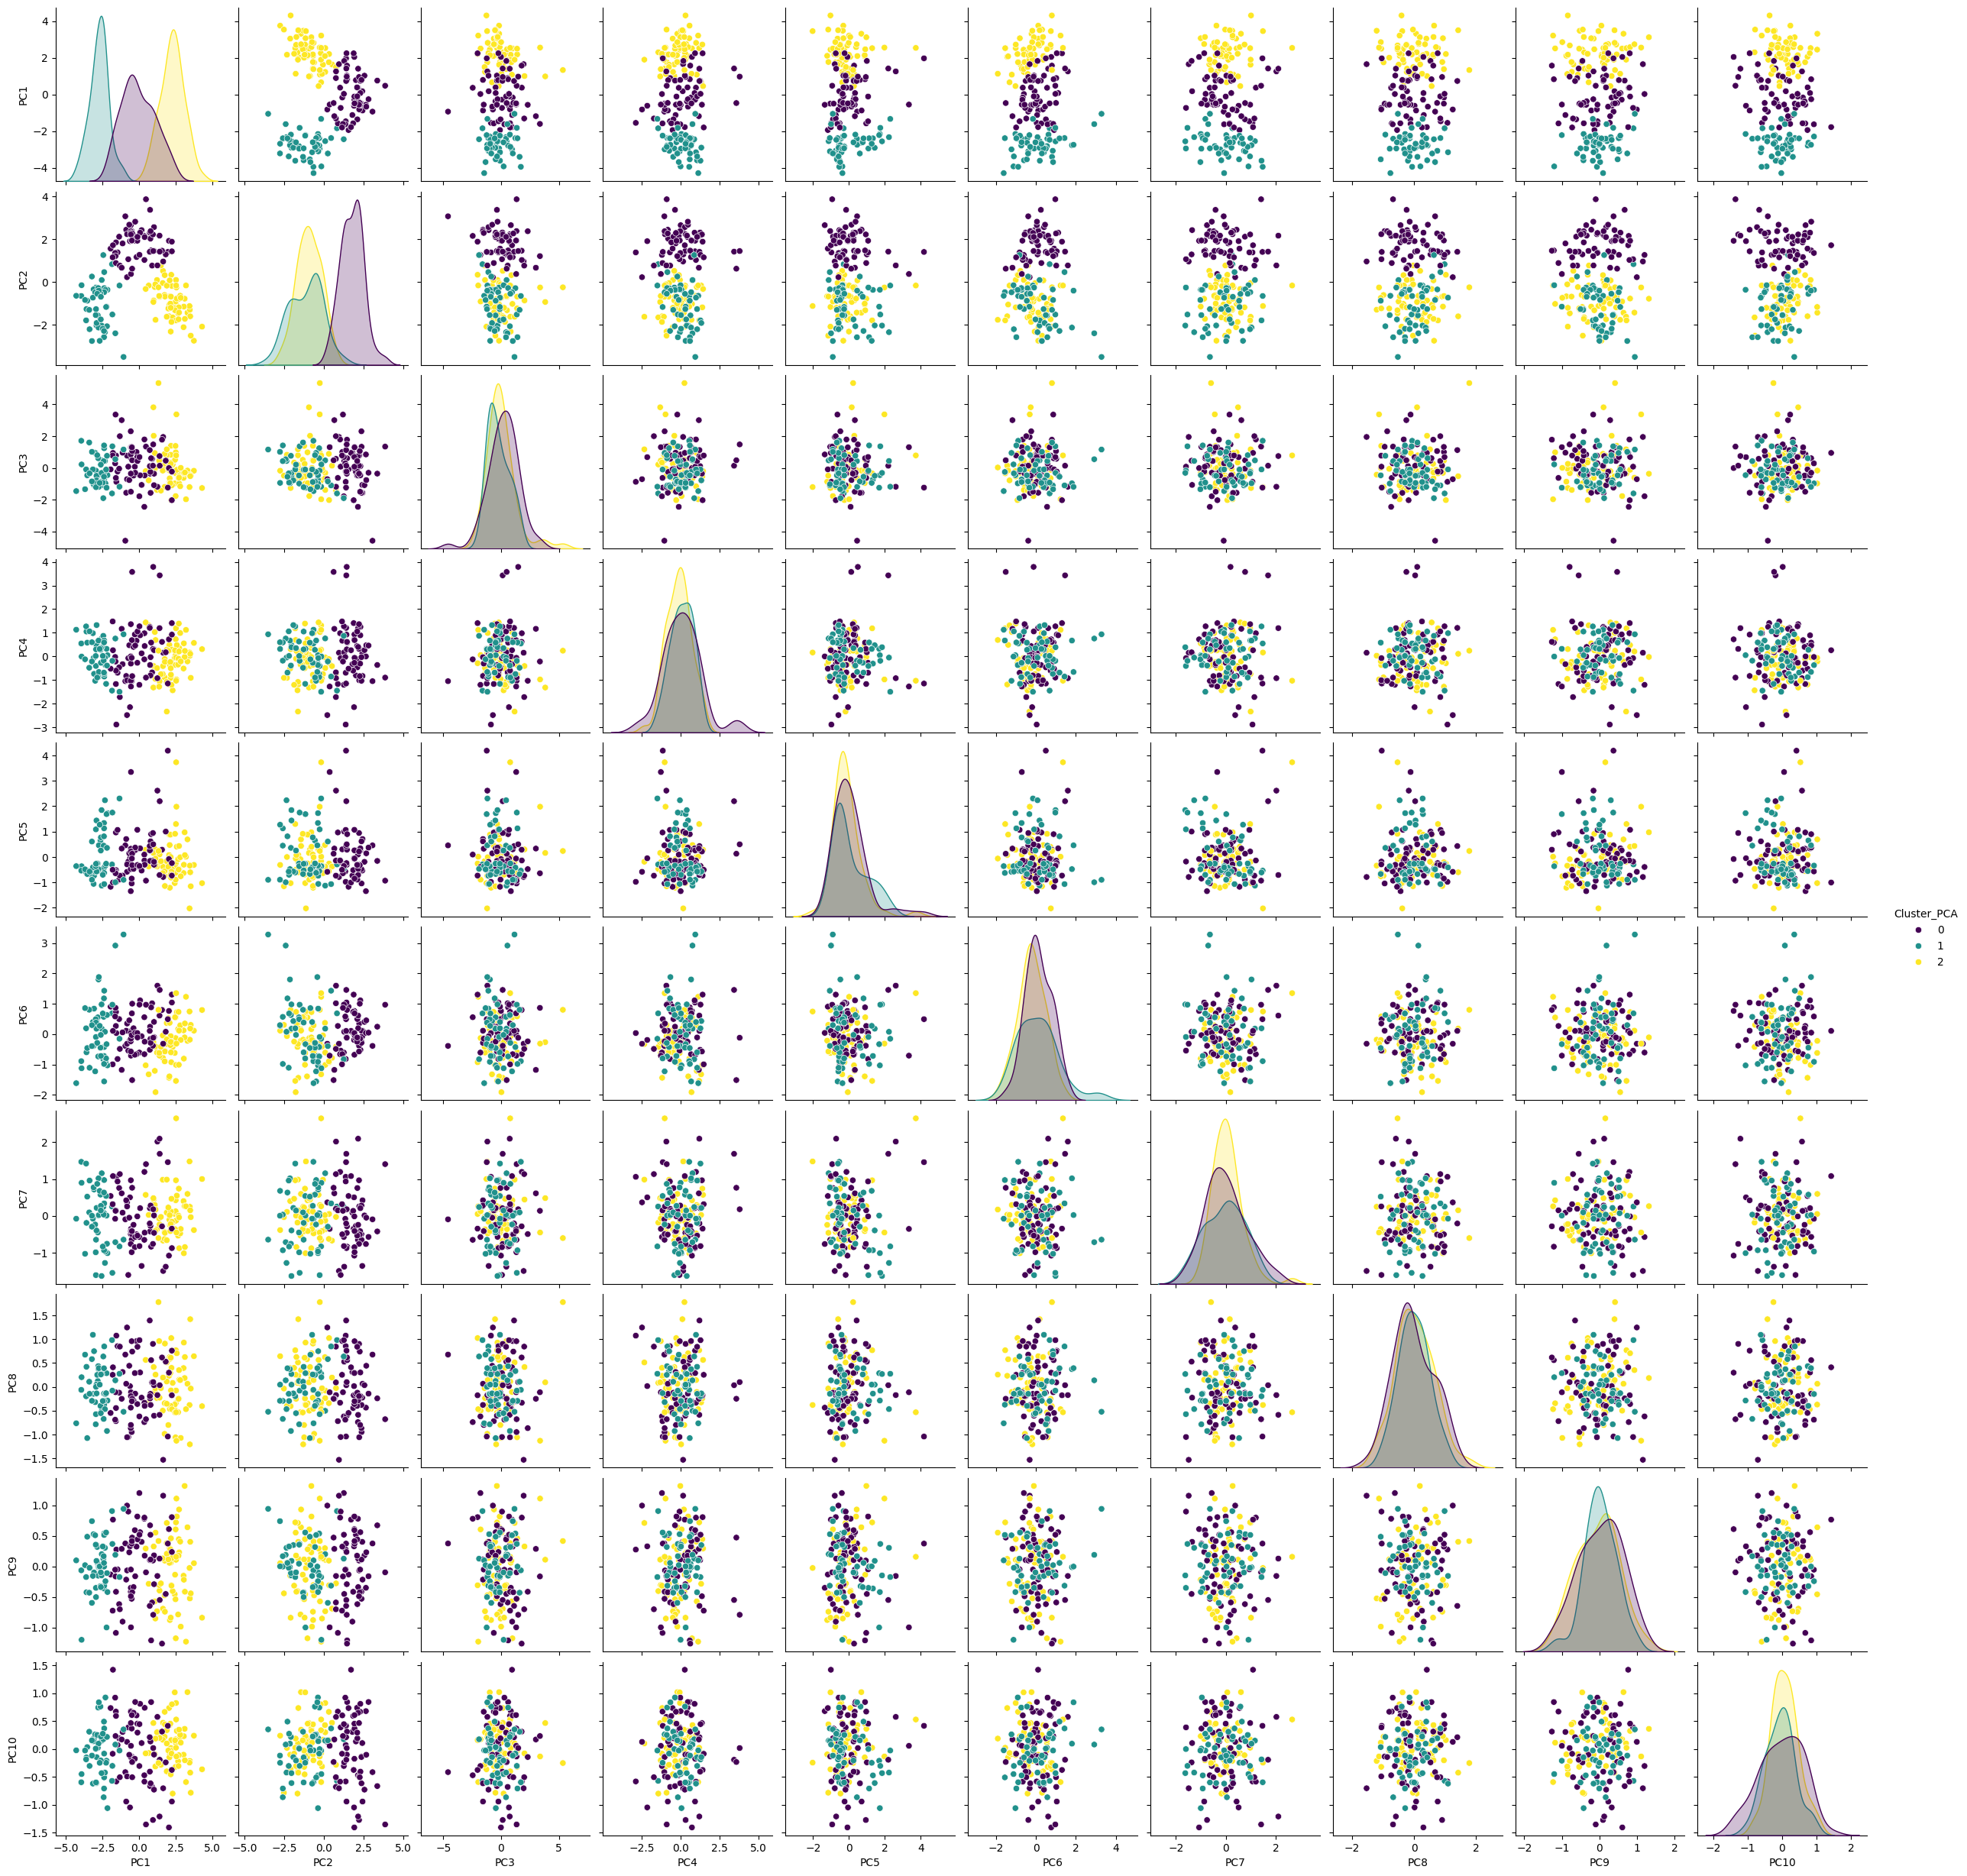

In [25]:
# Visualize the clustering results
sns.pairplot(pca_df, hue='Cluster_PCA', palette='viridis')
plt.show()

### **3.	Compare the clustering results from PCA-transformed data with those from the original dataset.**

In [26]:
# Evaluate clustering performance
silhouette_pca = silhouette_score(pca_data, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data, clusters_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies–Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.29867482943692897
Davies–Bouldin Index (PCA Data): 1.336326333515576


## **Task 5: Comparison and Analysis:**

### **1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.**

In [27]:
# Compare clustering performance
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies–Bouldin Index (Original Data): {davies_bouldin_original}')
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies–Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (Original Data): 0.2848589191898987
Davies–Bouldin Index (Original Data): 1.3891879777181648
Silhouette Score (PCA Data): 0.29867482943692897
Davies–Bouldin Index (PCA Data): 1.336326333515576


### **2.	Discuss any similarities or differences observed in the clustering results.**

**Similarities and Differences:**

- **Silhouette Score**: A higher silhouette score indicates better-defined clusters. Comparing the scores, we can determine which dataset provided more distinct clusters. If the scores are similar, it suggests that dimensionality reduction did not significantly impact cluster quality.
- **Davies-Bouldin Index**: A lower Davies-Bouldin index indicates better clustering performance. Comparing these indices will show which dataset resulted in more compact and well-separated clusters.

For instance, if both the silhouette score and Davies-Bouldin index are better for the PCA-transformed data, it indicates that PCA helped in improving clustering performance by reducing noise and making the data more manageable.

### **3.	Reflect on the impact of dimensionality reduction on clustering performance.**

**Impact of Dimensionality Reduction:**

- **Noise Reduction**: PCA helps in reducing noise by focusing on the components that capture the most variance in the data. This can lead to better clustering performance, as evident from improved silhouette scores or Davies-Bouldin indices.
- **Computational Efficiency**: Clustering algorithms like K-means can be computationally intensive on high-dimensional data. PCA reduces the dimensionality, thus speeding up the clustering process and potentially leading to more efficient and faster computations.
- **Interpretability**: While PCA-transformed data might lose some original feature interpretability, it can reveal underlying structures that are not obvious in the original data.

### **4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.**

**Trade-offs:**

- **Data Variance vs. Simplicity**: PCA reduces dimensionality by capturing the most significant variance. However, it might discard some minor but potentially important information. Clustering on the original data ensures no information is lost, but it might include noise and irrelevant features.
- **Interpretability**: Clustering on the original dataset allows for direct interpretation of clusters based on original features. PCA-transformed data might require additional steps to interpret the principal components.
- **Performance**: PCA can enhance clustering performance by removing noise and redundant features, as indicated by improved clustering metrics. However, if the original dataset is not very high-dimensional, the performance gain might be minimal.

**Recommendations:**

- **High-dimensional Data**: Use PCA before clustering to improve performance and efficiency.
- **Low-dimensional Data**: Clustering directly on the original data might be sufficient, as the benefits of PCA may not be significant.
- **Interpretability**: If interpretability is crucial, consider clustering on the original data or using PCA with fewer components to retain some level of interpretability.

## **Task 6: Conclusion and Insights**

### **1.	Summarize the key findings and insights from the assignment.**